In [ ]:
from google.colab import drive
import sys
drive.mount('/content/drive')
sys.path.append("/content/drive/MyDrive/32513/nn/")
sys.path.append("/content/drive/MyDrive/32513/nn/tests")

In [60]:
from pathlib import Path
from test_setup import *
from network import *

In [61]:
import numpy as np

# Data Preprocessing

> Dataset: [IRIS - from UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/53/iris)

Converts the `target` labels into one-hot encodings in the `desired` array

In [62]:
from sklearn.datasets import load_iris

data    = load_iris()
inputs  = data["data"]
labels  = data["target_names"]
targets = data["target"]

desired = []
onehot_to_label = {}
label_to_onehot = {}
onehot_to_idx   = {}
label_to_idx    = {}

for target in targets:
    onehot  = tuple(1 if target == l else 0 for l in range(len(labels)))
    desired.append(onehot)

for l, label in enumerate(labels):
    onehot_to_label[tuple(1 if l == i else 0 for i in range(len(labels)))]  = labels[l]
    label_to_onehot[labels[l]] = tuple(1 if l == i else 0 for i in range(len(labels)))
    onehot_to_idx[tuple(1 if l == i else 0 for i in range(len(labels)))]    = l
    label_to_idx[label] = l

In [63]:
from sklearn.model_selection import train_test_split

# Data split
X_train, X_test, y_train, y_test    = train_test_split(
    inputs, desired, test_size=0.2, random_state=42
)

# Cross Entropy Model

In [70]:
def cross_entropy(y_true, y_pred, eps=1e-15):
    y_pred = np.clip(y_pred, eps, 1 - eps)  # avoid log(0)
    loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
    return loss

In [ ]:
cenn  = Network(
    layer_sizes=[inputs.shape[1], 16, len(labels)],
    active=Activation.logistic,
    learn=LearningRule.gradient,
    loss="cross-entropy",
    random_seed=0
)

## Pre-training Evaluation

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# TESTING
y_pred  = []
y_true  = [onehot_to_label[onehot] for onehot in y_test]
for i in range(len(X_test)):
    raw_pred    = cenn.predict(X_test[i])
    onehot_pred = tuple(1 if l == np.argmax(raw_pred) else 0 for l in range(len(labels)))

    y_pred.append(onehot_to_label[onehot_pred])


              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        10
  versicolor       0.00      0.00      0.00         9
   virginica       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30



c:\Users\Cyrus\anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyrus\anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyrus\anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


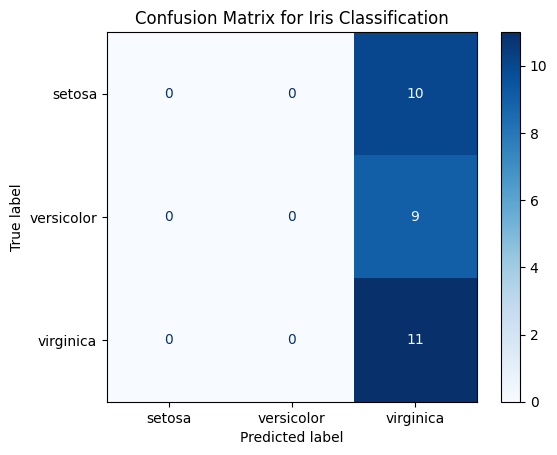

In [67]:
print(classification_report(y_true, y_pred, labels=labels))

# Compute confusion matrix
cm  = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')   # you can change cmap if you like
plt.title("Confusion Matrix for Iris Classification")
plt.show()

## Training

In [68]:
cycle_error = []

In [ ]:
# TRAINING
for epoch in range(1000):
    total_loss = 0
    for i in range(len(X_train)):
        cenn.train(X_train[i], y_train[i], 0.001, 0.9)
        y_pred  = cenn.predict(X_train[i])
        total_loss += cross_entropy(y_train[i], y_pred)
        # total_loss += mse(y_train[i], y_pred, len(y_pred))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss {total_loss}")

    cycle_error.append(total_loss)

Epoch 0, Loss 68.98342507386982
Epoch 100, Loss 19.602617519386605
Epoch 200, Loss 15.593213283421695
Epoch 300, Loss 14.069301155528835
Epoch 400, Loss 13.209252203006168
Epoch 500, Loss 12.481563122633036
Epoch 600, Loss 11.723176219187064
Epoch 700, Loss 10.881564930643567
Epoch 800, Loss 9.959417850851718
Epoch 900, Loss 8.993071923321084


## Post-training Evaluation

In [72]:
# TESTING
y_pred  = []
y_true  = [onehot_to_label[onehot] for onehot in y_test]
for i in range(len(X_test)):
    raw_pred    = nn.predict(X_test[i])
    onehot_pred = tuple(1 if l == np.argmax(raw_pred) else 0 for l in range(len(labels)))

    y_pred.append(onehot_to_label[onehot_pred])


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



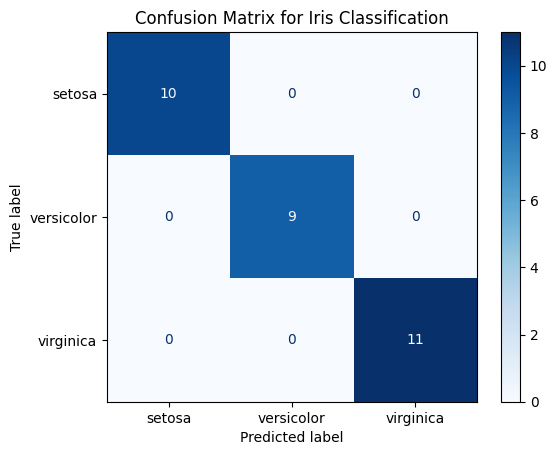

In [73]:
print(classification_report(y_true, y_pred, labels=labels))

# Compute confusion matrix
cm  = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')   # you can change cmap if you like
plt.title("Confusion Matrix for Iris Classification")
plt.show()

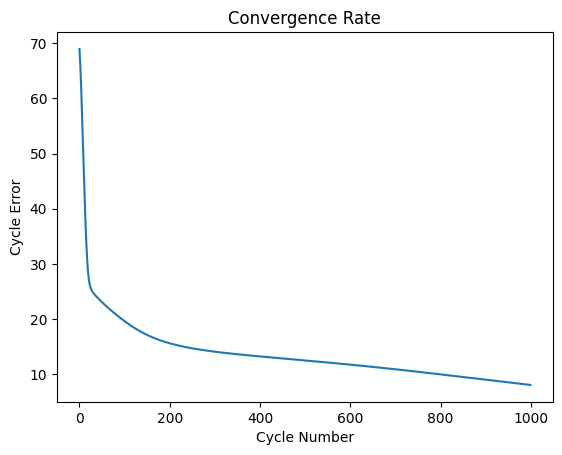

In [74]:
plt.plot(cycle_error)
plt.title("Convergence Rate")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Error")
plt.show()

# Mean Squared Error Model

In [69]:
def mse(y_true, y_pred, n):
    result = 0
    for i in range(len(y_true)):
        result += (y_true[i] - y_pred[i])**2

    return result/n

In [ ]:
msenn  = Network(
    layer_sizes=[inputs.shape[1], 16, len(labels)],
    active=Activation.logistic,
    learn=LearningRule.gradient,
    loss="mse",
    random_seed=0
)

## Pre-training Evaluation

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# TESTING
y_pred  = []
y_true  = [onehot_to_label[onehot] for onehot in y_test]
for i in range(len(X_test)):
    raw_pred    = msenn.predict(X_test[i])
    onehot_pred = tuple(1 if l == np.argmax(raw_pred) else 0 for l in range(len(labels)))

    y_pred.append(onehot_to_label[onehot_pred])


              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        10
  versicolor       0.00      0.00      0.00         9
   virginica       0.37      1.00      0.54        11

    accuracy                           0.37        30
   macro avg       0.12      0.33      0.18        30
weighted avg       0.13      0.37      0.20        30



c:\Users\Cyrus\anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyrus\anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Cyrus\anaconda3\envs\tfenv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


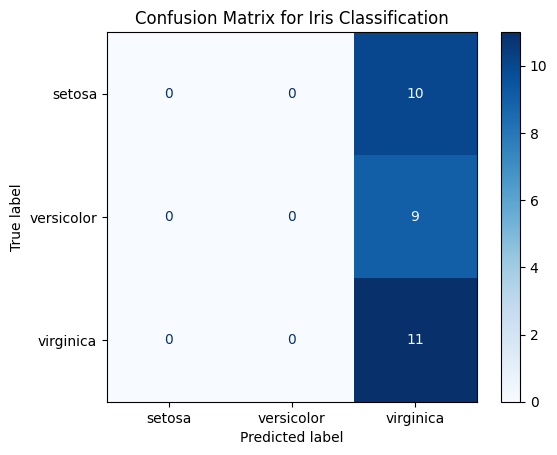

In [ ]:
print(classification_report(y_true, y_pred, labels=labels))

# Compute confusion matrix
cm  = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')   # you can change cmap if you like
plt.title("Confusion Matrix for Iris Classification")
plt.show()

## Training

In [ ]:
cycle_error = []

In [ ]:
# TRAINING
for epoch in range(1000):
    total_loss = 0
    for i in range(len(X_train)):
        msenn.train(X_train[i], y_train[i], 0.001, 0.9)
        y_pred  = msenn.predict(X_train[i])
        # total_loss += cross_entropy(y_train[i], y_pred)
        total_loss += mse(y_train[i], y_pred, len(y_pred))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss {total_loss}")

    cycle_error.append(total_loss)

Epoch 0, Loss 68.98342507386982
Epoch 100, Loss 19.602617519386605
Epoch 200, Loss 15.593213283421695
Epoch 300, Loss 14.069301155528835
Epoch 400, Loss 13.209252203006168
Epoch 500, Loss 12.481563122633036
Epoch 600, Loss 11.723176219187064
Epoch 700, Loss 10.881564930643567
Epoch 800, Loss 9.959417850851718
Epoch 900, Loss 8.993071923321084


## Post-training Evaluation

In [ ]:
# TESTING
y_pred  = []
y_true  = [onehot_to_label[onehot] for onehot in y_test]
for i in range(len(X_test)):
    raw_pred    = msenn.predict(X_test[i])
    onehot_pred = tuple(1 if l == np.argmax(raw_pred) else 0 for l in range(len(labels)))

    y_pred.append(onehot_to_label[onehot_pred])


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



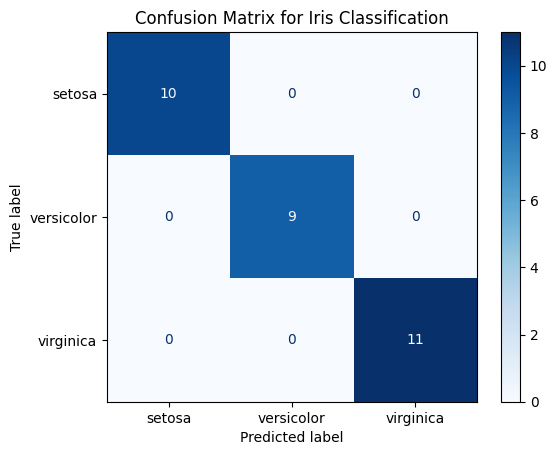

In [ ]:
print(classification_report(y_true, y_pred, labels=labels))

# Compute confusion matrix
cm  = confusion_matrix(y_true, y_pred)
ConfusionMatrixDisplay(cm)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')   # you can change cmap if you like
plt.title("Confusion Matrix for Iris Classification")
plt.show()

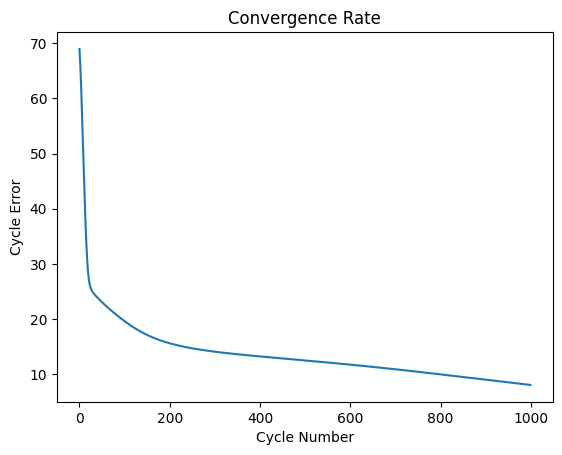

In [ ]:
plt.plot(cycle_error)
plt.title("Convergence Rate")
plt.xlabel("Cycle Number")
plt.ylabel("Cycle Error")
plt.show()